# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [3]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [26]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [65]:
sgdc = SGDClassifier(max_iter=200, tol=0.5)
print(sgdc)

SGDClassifier(max_iter=200, tol=0.5)


In [66]:
sgdc.fit(X_train, y_train)

SGDClassifier(max_iter=200, tol=0.5)

In [67]:
score = sgdc.score(X_train, y_train)
print("Training score: ", score) 

Training score:  0.8360302049622438


In [63]:
# Predicting and accuracy check
ypred = sgdc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm) 

[[762   8]
 [156   1]]


In [ ]:
para este cuadro de confusion se observa que obtuvimos:
TP (verdaderos positivos) = 762
FP (falsos positivos) = 8
FN (falsos negativos) = 156
TN (verdaderos negativos) = 1

SyntaxError: invalid syntax (1053648486.py, line 1)

In [64]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       770
           1       0.11      0.01      0.01       157

    accuracy                           0.82       927
   macro avg       0.47      0.50      0.46       927
weighted avg       0.71      0.82      0.75       927



In [68]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, ypred, drop_intermediate=True)

In [58]:
fpr, tpr, threshold

(array([0.        , 0.01038961, 1.        ]),
 array([0.        , 0.00636943, 1.        ]),
 array([2, 1, 0], dtype=int64))

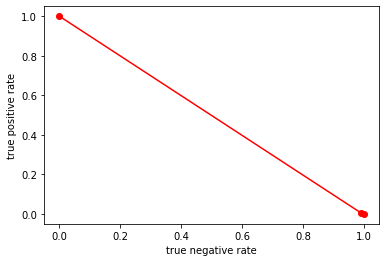

In [61]:
plt.plot(1.0 - fpr, tpr, color="red")
plt.scatter(1.0 - fpr, tpr, color="red")
plt.xlabel("false positive rate")
plt.xlabel("true negative rate")
plt.ylabel("true positive rate")
plt.show()

In [46]:
tpr[2], fpr[2], threshold[2]

(1.0, 1.0, 0)

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, ypred)

0.5005252709074365

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, ypred)

In [49]:
precision, recall, threshold

(array([0.16936354, 0.18181818, 1.        ]),
 array([1.        , 0.01273885, 0.        ]),
 array([0, 1], dtype=int64))

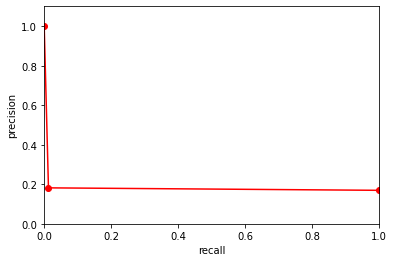

In [50]:
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.plot(recall, precision, color="red")
plt.scatter(recall, precision, color="red")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [72]:
# 2.2-
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
}

In [73]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = DecisionTreeClassifier(**params, random_state=0)
    #model.fit(...)
    #model.predict(...)

{'criterion': 'gini', 'max_depth': 1}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 1}
{'criterion': 'entropy', 'max_depth': 2}


In [74]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y);

In [75]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	| mean	std	rank
gini	1	| 0.87	0.01	1
gini	2	| 0.86	0.02	2
entropy	1	| 0.85	0.02	3
entropy	2	| 0.85	0.02	3


In [77]:
model = SGDClassifier(random_state=0)

In [78]:
from sklearn.utils.fixes import loguniform
from scipy import stats

param_dist = {
    'loss': [
        'hinge',        # SVM
        'log',          # logistic regression
        #'preceptron',  # perceptron (not supported)
    ],
    'alpha': loguniform(1e-4, 1e2),  # de 0.0001 a 100.0
}

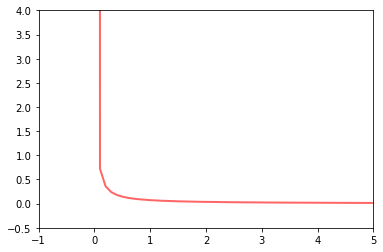

In [90]:
from scipy.stats import loguniform

import matplotlib.pyplot as plt
a= 1e-4
b=100
fig, ax = plt.subplots(1, 1)
x = np.linspace(a, b, 1000)
plt.xlim(-1, 5)
plt.ylim(-0.50,4)
ax.plot(x, loguniform.pdf(x, a, b), 'r-', lw=2, alpha=0.6, label='loguniform pdf')

In [91]:
from sklearn.model_selection import ParameterSampler

for params in ParameterSampler(param_dist, 10, random_state=0):
    print(params)
    model = SGDClassifier(**params, random_state=0)

{'alpha': 0.196282248134428, 'loss': 'log'}
{'alpha': 11.630395714480306, 'loss': 'log'}
{'alpha': 0.18590843630169634, 'loss': 'log'}
{'alpha': 0.5512926225087423, 'loss': 'hinge'}
{'alpha': 0.042220489831498266, 'loss': 'hinge'}
{'alpha': 0.0002189161813274828, 'loss': 'hinge'}
{'alpha': 0.01998246739232945, 'loss': 'hinge'}
{'alpha': 7.46470024356059, 'loss': 'hinge'}
{'alpha': 0.256016152500287, 'loss': 'log'}
{'alpha': 10.386580256500283, 'loss': 'hinge'}


In [92]:
from sklearn.model_selection import RandomizedSearchCV

model = SGDClassifier(random_state=0)

cv = RandomizedSearchCV(model, param_dist, n_iter=10, cv=3, random_state=0)
cv.fit(X, y);

In [93]:
import pandas as pd
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,mean_test_score,std_test_score,rank_test_score
0,log,0.196282,0.611650,0.300922,8
1,log,11.630396,0.826861,0.004764,1
2,log,0.185908,0.611650,0.300922,8
3,hinge,0.551293,0.826321,0.009916,2
4,hinge,0.04222,0.823625,0.008664,5
5,hinge,0.000219,0.823625,0.008664,5
6,hinge,0.019982,0.823625,0.008664,5
7,hinge,7.4647,0.826321,0.009916,2
8,log,0.256016,0.611650,0.300922,8
9,hinge,10.38658,0.826321,0.009916,2


In [94]:
cv.best_estimator_

SGDClassifier(alpha=11.630395714480306, loss='log', random_state=0)

In [95]:
cv.best_params_

{'alpha': 11.630395714480306, 'loss': 'log'}

In [96]:
sgdc = SGDClassifier(alpha=11.630395714480306, loss='log', random_state=0)
print(sgdc)

SGDClassifier(alpha=11.630395714480306, loss='log', random_state=0)


In [98]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=11.630395714480306, loss='log', random_state=0)

In [99]:
score = sgdc.score(X_train, y_train)
print("Training score: ", score) 

Training score:  0.8295577130528586


In [100]:
# Predicting and accuracy check
ypred = sgdc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm) 

[[763   7]
 [156   1]]


In [101]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       770
           1       0.12      0.01      0.01       157

    accuracy                           0.82       927
   macro avg       0.48      0.50      0.46       927
weighted avg       0.71      0.82      0.75       927




Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1.- Se trata de informacion referente a solicitudes de creditos y reporte crediticio de cada cliente.

2.- Automatizar las aprobaciones o negaciones de las solicitudes de creditos hipotecarios de los clientes.

3.- 
TARGET  = si el cliente pago a tiempo o no los creditos solicitados
LOAN    = monto del credito solicitados
MORTDUE = cantidad de la deuda o de hipoteca
VALUE   = Valor de la propiedad actual
YOJ     = Años en el trabajo actual
DEROG   = numeros de informes negativos del cliente
DELINQ  = cantidad de creditos morosos
CLAGE   = --
NINQ    = numeros de lineas de creditos recientes
CLNO    = numeros de creditos en general
DEBTINC = relacion deuda ingreso

4.- TARGET,LOAN,MORTDUE,VALUE,YOJ,DELINQ,DEBTINC

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html